In [1]:
import os
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from functools import partial

##import sys
#sys.path.append(os.path.abspath('./src/accuracy_bounds/utils/visualizations'))
#sys.path.append(os.path.abspath('src/accuracy_bounds/inverseproblems/kersize_compute'))

from accuracy_bounds.utils.visualizations import plot_wckersize_conv, plot_avkersize_conv, visualize_ball_3d
from accuracy_bounds.utils.utils import apply_forwardmodel, set_seed
from accuracy_bounds.inverseproblems.feasible_sets import compute_feasible_set_linear_forwardmodel
from accuracy_bounds.inverseproblems.kersize_compute import worstcase_kernelsize, average_kernelsize, worstcase_kernelsize_sym

from data.linear_algebra_examples.generator_functions import random_uni_points_in_ball
from data.linear_algebra_examples.dataset_generator import GeneratorDataset


### **Toy Example 1:** Worst Case Kernel Size over Uniform Points in 3D Ball 

In [2]:
num_points = 1000
radius = 2
center = (0,0,0)
dim = 3
epsilon=1e-1
seed = 43

set_seed(seed)


#### Collect Data

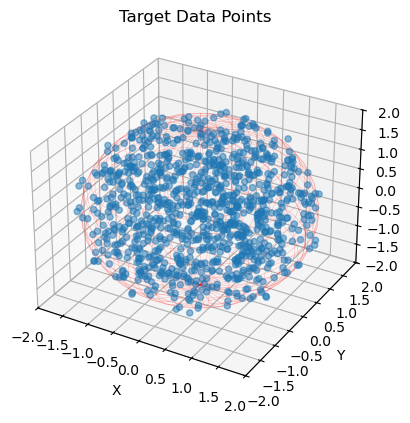

In [3]:
target_data = random_uni_points_in_ball(num_points=num_points, radius=radius+epsilon, center=center, dim=3)                       
visualize_ball_3d(points=target_data, radius=radius, center=center, title="Target Data Points")

### Setup Linear Forward Operator and analytical Kernel Size

In [4]:
# Toy forward operator
A = np.diag([1, 1, 0])  # Transformation matrix

#analytical wc kersize for ball around 0 with radius r+epsilon
wc_kernel_size_analytical = 2*radius+2*epsilon
#analytical av kersize for ball around 0 with radius r+epsilon sampled with uniform distribution
av_kernel_size_analytical = np.power((radius+epsilon),1/3)

# Distance measure
p_1=2
p_2=2
# Kernel Size order
p=2

input_data = apply_forwardmodel(A, target_data)

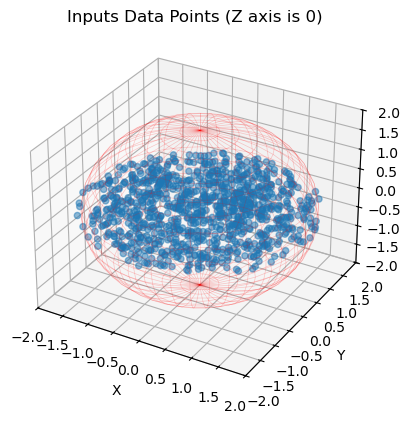

In [5]:
visualize_ball_3d(points=input_data, radius=radius, center=center, title="Inputs Data Points (Z axis is 0)")

### Setup WC-Kernal Size Computation

In [6]:
max_k = 300
input_target_pairs = 500

##### Compute Worst-Case Kernel Size

In [7]:
# Step 1: Compute feasible sets from the linear forward model and data:
feasible_sets_list = []
for y in input_data[:input_target_pairs]:
 feas_set_y = compute_feasible_set_linear_forwardmodel(A, y, target_data[:input_target_pairs], p_2, epsilon)
 feasible_sets_list.append(feas_set_y)

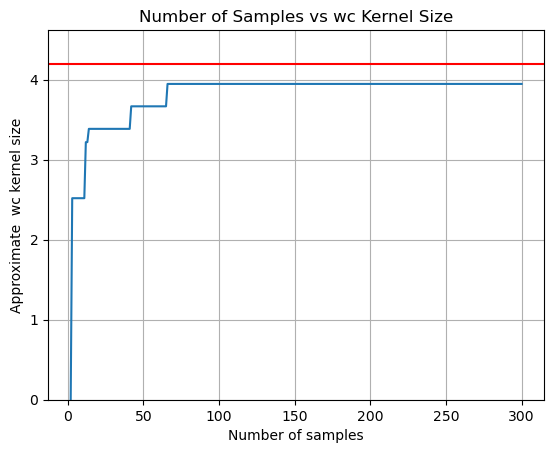

Total Max Kernel Size: 3.9474366440864537
Analytical Kernel Size: 4.2
Relative Error: -0.060134132360368214


In [8]:
# Step 2: Compute worst-case kernel sizes:
worstcase_kersize = worstcase_kernelsize(feasible_sets_list, p_1, p)

worstcase_kersize_list = []
for k in range(0,max_k-1):
    worstcase_kersize =  worstcase_kernelsize(feasible_sets_list[:k], p_1, p)
    worstcase_kersize_list.append(worstcase_kersize)

plot_wckersize_conv(worstcase_kersize, worstcase_kersize_list, wc_kernel_size_analytical, max_k)


In [9]:
x = np.array([0, 2, 4, 5])
print(x[0:2])

[0 2]


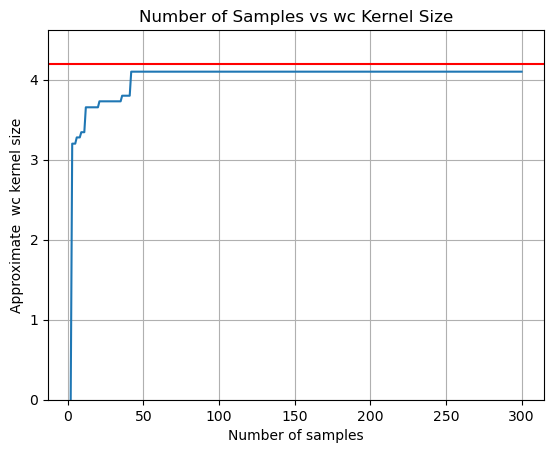

Total Max Kernel Size: 4.100599336647672
Analytical Kernel Size: 4.2
Relative Error: -0.023666824607697114


In [10]:
# Step 2: Compute worst-case kernel sizes with symmetry assumption:
worstcase_kersize = worstcase_kernelsize_sym(A, input_data[:input_target_pairs], target_data, p_1, p_2, p, 2*epsilon)

worstcase_kersize_list = []
for k in range(0,max_k-1):
    worstcase_kersize = worstcase_kernelsize_sym(A, input_data[:k], target_data, p_1, p_2, p, epsilon)
    worstcase_kersize_list.append(worstcase_kersize)

plot_wckersize_conv(worstcase_kersize, worstcase_kersize_list, wc_kernel_size_analytical, max_k)

### Setup Average-Kernal Size Computation

In [11]:
max_k = 150
input_target_pairs = 1000

In [12]:

average_kersize = average_kernelsize(A, input_data[:input_target_pairs], target_data[:input_target_pairs], p_1, p_2, p, epsilon)

av_kersizef = av_kersizes[-1]

plot_avkersize_conv(av_kersizef, av_kersizes, av_kernel_size_analytical, max_k)

TypeError: average_kernelsize() takes 3 positional arguments but 7 were given